# 외국인 따릉이 대여/반납 장소 순위 분석

## 분석 목표
1. 3년간(2021-2024) 연도별 외국인 따릉이 대여/반납 장소 순위
2. 2024년 기준 월별 외국인 따릉이 대여/반납 장소 순위
3. 2024년 기준 요일별 외국인 따릉이 대여/반납 장소 순위

**목적**: 외국인이 어느 장소에서 따릉이를 주로 이용하는지, 월별/요일별 패턴이 있는지 분석

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib import rcParams
import warnings
import os

# 한글 폰트 경고 무시
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# Windows 시스템 폰트를 직접 로드하는 함수
def setup_korean_font():
    """Windows 시스템의 한글 폰트를 직접 로드하고 설정"""
    
    # 폰트 파일 경로들 (우선순위 순)
    font_paths = [
        r'C:\Windows\Fonts\malgun.ttf',      # 맑은 고딕
        r'C:\Windows\Fonts\malgunbd.ttf',    # 맑은 고딕 Bold
        r'C:\Windows\Fonts\gulim.ttc',       # 굴림
        r'C:\Windows\Fonts\batang.ttc'       # 바탕
    ]
    
    korean_font = None
    
    for font_path in font_paths:
        if os.path.exists(font_path):
            try:
                # 폰트를 직접 로드
                korean_font = fm.FontProperties(fname=font_path)
                
                # matplotlib 폰트 매니저에 폰트 추가
                fm.fontManager.addfont(font_path)
                
                print(f"✅ 폰트 로드 성공: {font_path}")
                print(f"   폰트명: {korean_font.get_name()}")
                
                # matplotlib 전역 설정에 폰트 적용
                font_name = korean_font.get_name()
                plt.rcParams['font.family'] = font_name
                rcParams['font.family'] = font_name
                plt.rcParams['axes.unicode_minus'] = False
                
                # 실제 적용된 폰트 확인
                print(f"   실제 설정된 폰트: {font_name}")
                
                return korean_font
                
            except Exception as e:
                print(f"❌ {font_path} 로드 실패: {e}")
                continue
    
    print("❌ 모든 한글 폰트 로드 실패")
    return None

# 한글 폰트 설정 실행
korean_font_prop = setup_korean_font()

# seaborn 스타일 설정
sns.set_style("whitegrid")

print("라이브러리 로드 완료")


✅ 폰트 로드 성공: C:\Windows\Fonts\malgun.ttf
   폰트명: Malgun Gothic
   실제 설정된 폰트: Malgun Gothic
라이브러리 로드 완료


## 1. 연도별 외국인 대여/반납 장소 순위 분석 (2021-2024)

In [107]:
# 연도별 데이터 파일 경로
yearly_files = {
    2021: '../Monthly_21년_외국인대여정보.csv',
    2022: '../Monthly_22년_외국인대여정보.csv',
    2023: '../Monthly_23년_외국인대여정보.csv',
    2024: '../Monthly_24년_외국인대여정보.csv'
}

yearly_rental_rankings = {}
yearly_return_rankings = {}

for year, file_path in yearly_files.items():
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print(f"\n{year}년 데이터 로드: {len(df)} rows")
        print(f"컬럼: {list(df.columns)}")
        
        # 컬럼명 통일 (2024년은 '대여소명', 다른 년도는 '대여소')
        if '대여소명' in df.columns:
            station_col = '대여소명'
        else:
            station_col = '대여소'
        
        # 대여소별 대여건수 합계 (상위 10개)
        rental_by_station = df.groupby(station_col)['대여건수'].sum().sort_values(ascending=False)
        yearly_rental_rankings[year] = rental_by_station.head(10)
        
        # 대여소별 반납건수 합계 (상위 10개)
        return_by_station = df.groupby(station_col)['반납건수'].sum().sort_values(ascending=False)
        yearly_return_rankings[year] = return_by_station.head(10)
        
        print(f"{year}년 최고 대여 장소: {rental_by_station.index[0]} ({rental_by_station.iloc[0]}건)")
        print(f"{year}년 최고 반납 장소: {return_by_station.index[0]} ({return_by_station.iloc[0]}건)")
        
    except Exception as e:
        print(f"{year}년 데이터 처리 실패: {e}")

print("\n=== 연도별 상위 대여/반납 장소 데이터 수집 완료 ===")



2021년 데이터 로드: 7655 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2021년 최고 대여 장소: 207. 여의나루역 1번출구 앞 (587건)
2021년 최고 반납 장소: 207. 여의나루역 1번출구 앞 (559건)

2022년 데이터 로드: 11743 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2022년 최고 대여 장소: 207. 여의나루역 1번출구 앞 (1823건)
2022년 최고 반납 장소: 207. 여의나루역 1번출구 앞 (1525건)

2023년 데이터 로드: 11969 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2023년 최고 대여 장소: 207. 여의나루역 1번출구 앞 (2236건)
2023년 최고 반납 장소: 207. 여의나루역 1번출구 앞 (2069건)

2024년 데이터 로드: 14055 rows
컬럼: ['년월', '대여소명', '대여건수', '반납건수']
2024년 최고 대여 장소: 207. 여의나루역 1번출구 앞 (1990건)
2024년 최고 반납 장소: 207. 여의나루역 1번출구 앞 (1789건)

=== 연도별 상위 대여/반납 장소 데이터 수집 완료 ===


## 2. 2024년 월별 외국인 대여/반납 장소 순위 분석

c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s)

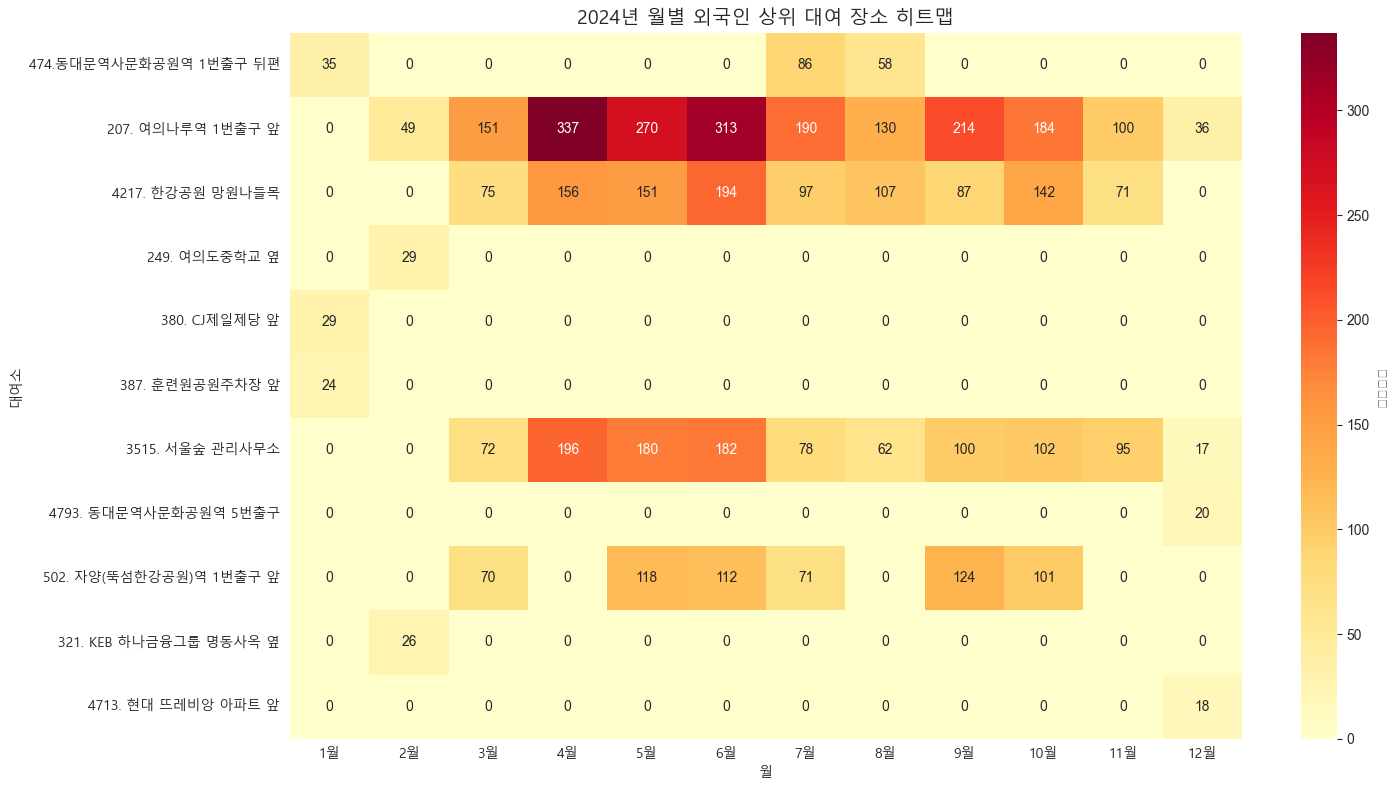

In [108]:
# 2024년 월별 상위 대여 장소 히트맵
if 'monthly_rental_rankings' in locals() and monthly_rental_rankings:
    # 모든 월에서 상위에 등장하는 장소들 수집
    all_top_stations = set()
    for month_ranking in monthly_rental_rankings.values():
        all_top_stations.update(month_ranking.index[:3])  # 상위 3개 장소만
    
    # 데이터프레임 생성 (장소 x 월)
    heatmap_data = []
    for station in all_top_stations:
        row = []
        for month in range(1, 13):
            if month in monthly_rental_rankings:
                ranking = monthly_rental_rankings[month]
                if station in ranking.index:
                    row.append(ranking[station])
                else:
                    row.append(0)
            else:
                row.append(0)
        heatmap_data.append(row)
    
    if heatmap_data:
        # 장소명을 간략하게 줄이기
        short_station_names = [name[:25] + '...' if len(name) > 25 else name for name in all_top_stations]
        
        heatmap_df = pd.DataFrame(heatmap_data, 
                                 index=short_station_names,
                                 columns=[f'{i}월' for i in range(1, 13)])
        
        plt.figure(figsize=(15, 8))
        sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='YlOrRd', 
                   cbar_kws={'label': '대여건수'})
        
        plt.title('2024년 월별 외국인 상위 대여 장소 히트맵', 
                 fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
        plt.xlabel('월', fontproperties=korean_font_prop)
        plt.ylabel('대여소', fontproperties=korean_font_prop)
        
        # x축과 y축 라벨에 한글 폰트 적용
        plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontproperties=korean_font_prop)
        plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontproperties=korean_font_prop)
        
        plt.tight_layout()
        plt.show()
    else:
        print("히트맵 데이터 생성 실패")
else:
    print("월별 대여 순위 데이터가 없습니다.")


c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) A

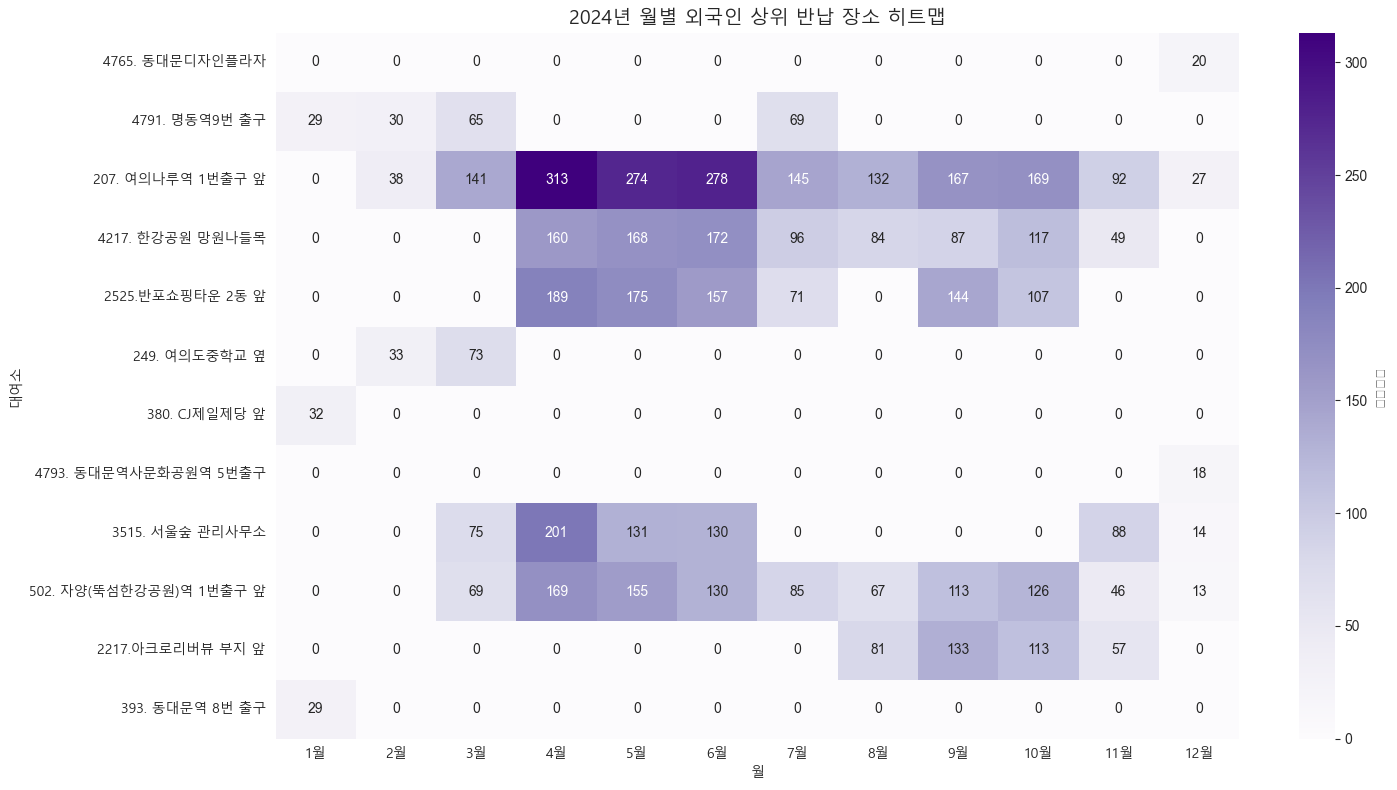

In [109]:
# 2024년 월별 상위 반납 장소 히트맵
if 'monthly_return_rankings' in locals() and monthly_return_rankings:
    # 모든 월에서 상위에 등장하는 장소들 수집
    all_top_return_stations = set()
    for month_ranking in monthly_return_rankings.values():
        all_top_return_stations.update(month_ranking.index[:3])  # 상위 3개 장소만
    
    # 데이터프레임 생성 (장소 x 월)
    heatmap_data = []
    for station in all_top_return_stations:
        row = []
        for month in range(1, 13):
            if month in monthly_return_rankings:
                ranking = monthly_return_rankings[month]
                if station in ranking.index:
                    row.append(ranking[station])
                else:
                    row.append(0)
            else:
                row.append(0)
        heatmap_data.append(row)
    
    if heatmap_data:
        # 장소명을 간략하게 줄이기
        short_station_names = [name[:25] + '...' if len(name) > 25 else name for name in all_top_return_stations]
        
        heatmap_df = pd.DataFrame(heatmap_data, 
                                 index=short_station_names,
                                 columns=[f'{i}월' for i in range(1, 13)])
        
        plt.figure(figsize=(15, 8))
        sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='Purples', 
                   cbar_kws={'label': '반납건수'})
        
        plt.title('2024년 월별 외국인 상위 반납 장소 히트맵', 
                 fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
        plt.xlabel('월', fontproperties=korean_font_prop)
        plt.ylabel('대여소', fontproperties=korean_font_prop)
        
        # x축과 y축 라벨에 한글 폰트 적용
        plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontproperties=korean_font_prop)
        plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontproperties=korean_font_prop)
        
        plt.tight_layout()
        plt.show()
    else:
        print("반납 히트맵 데이터 생성 실패")
else:
    print("월별 반납 순위 데이터가 없습니다.")


## 3. 2024년 요일별 외국인 대여/반납 장소 순위 분석

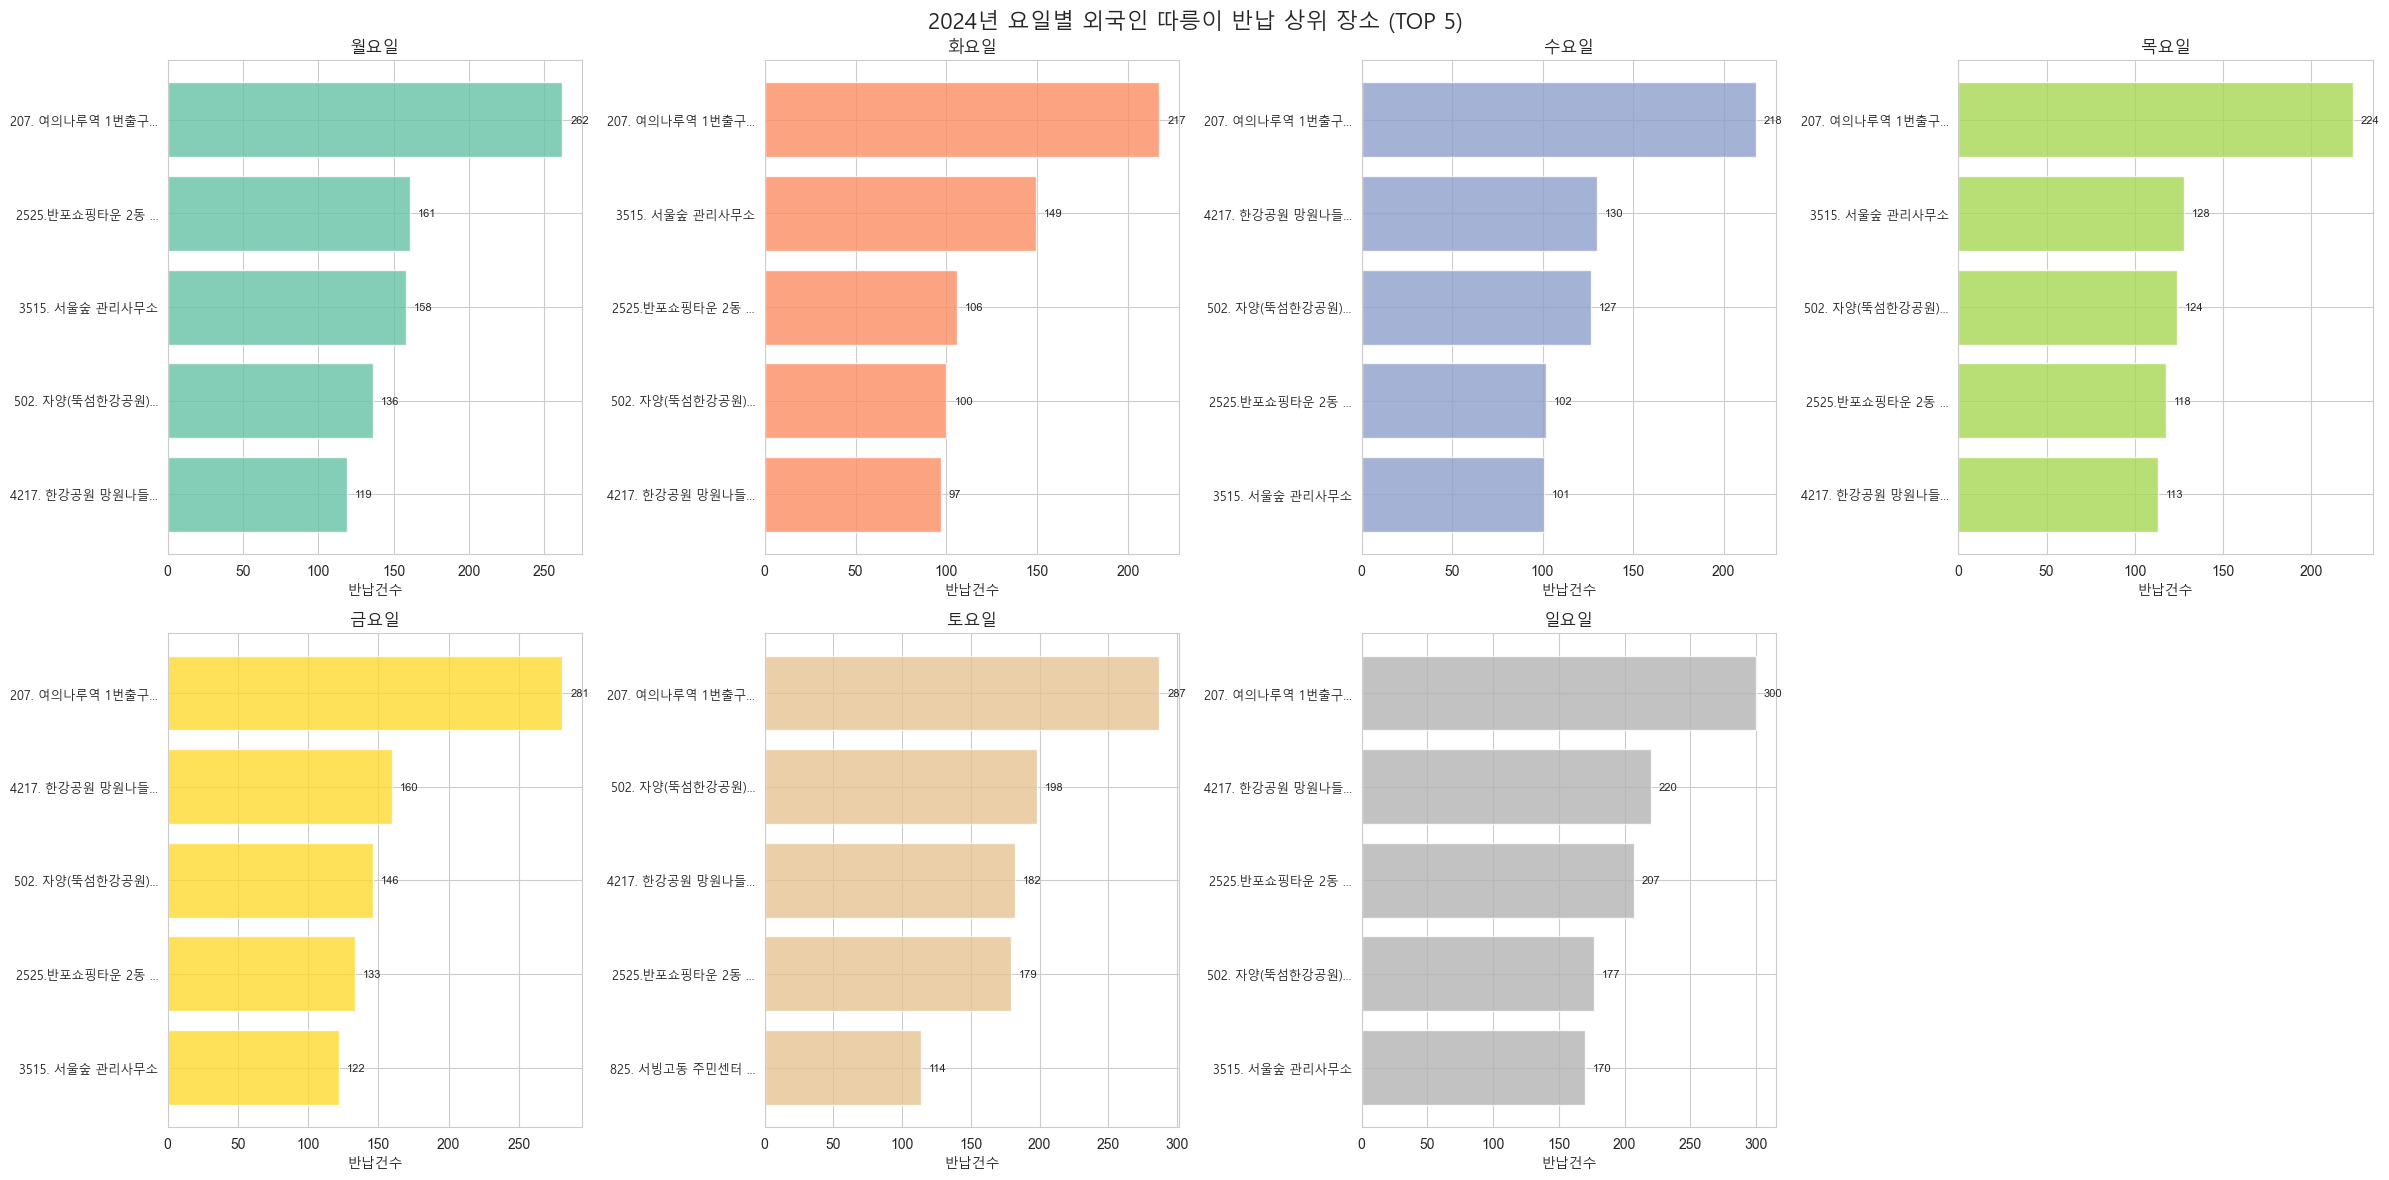

In [111]:
# 2024년 요일별 상위 반납 장소 비교
if 'weekday_return_rankings' in locals() and weekday_return_rankings:
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))
    fig.suptitle('2024년 요일별 외국인 따릉이 반납 상위 장소 (TOP 5)', 
                fontproperties=korean_font_prop, fontsize=16, fontweight='bold')
    
    colors = plt.cm.Set2(np.linspace(0, 1, 7))  # 7가지 색상
    
    for idx, (weekday, ranking) in enumerate(weekday_return_rankings.items()):
        if len(ranking) > 0:
            row = idx // 4
            col = idx % 4
            
            # 장소명을 간략하게 줄이기
            short_names = [name[:15] + '...' if len(name) > 15 else name for name in ranking.index]
            
            bars = axes[row, col].barh(range(len(ranking)), ranking.values, 
                                      color=colors[idx], alpha=0.8)
            axes[row, col].set_yticks(range(len(ranking)))
            axes[row, col].set_yticklabels(short_names, fontproperties=korean_font_prop, fontsize=9)
            axes[row, col].set_xlabel('반납건수', fontproperties=korean_font_prop)
            axes[row, col].set_title(f'{weekday}', fontproperties=korean_font_prop, 
                                   fontsize=12, fontweight='bold')
            axes[row, col].invert_yaxis()
            
            # 수치 표시
            for bar, value in zip(bars, ranking.values):
                axes[row, col].text(bar.get_width() + max(ranking.values) * 0.02, 
                                   bar.get_y() + bar.get_height()/2, 
                                   f'{value}', ha='left', va='center', fontsize=8)
    
    # 마지막 빈 subplot 제거
    if len(weekday_return_rankings) < 8:
        axes[1, 3].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("요일별 반납 순위 데이터가 없습니다.")


In [112]:
# 2024년 요일별 분석
if 'daily_df' in locals():
    # 요일 추가 (0=월요일, 6=일요일)
    daily_df['요일'] = daily_df['일시'].dt.dayofweek
    daily_df['요일명'] = daily_df['요일'].map({
        0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 
        4: '금요일', 5: '토요일', 6: '일요일'
    })
    
    weekday_rental_rankings = {}
    weekday_return_rankings = {}
    weekday_names = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    
    for weekday in weekday_names:
        weekday_data = daily_df[daily_df['요일명'] == weekday]
        
        if len(weekday_data) > 0:
            # 요일별 대여 장소 순위 (상위 5개)
            rental_ranking = weekday_data.groupby('대여소명')['대여건수'].sum().sort_values(ascending=False).head(5)
            weekday_rental_rankings[weekday] = rental_ranking
            
            # 요일별 반납 장소 순위 (상위 5개)
            return_ranking = weekday_data.groupby('대여소명')['반납건수'].sum().sort_values(ascending=False).head(5)
            weekday_return_rankings[weekday] = return_ranking
            
            print(f"{weekday} 최고 대여 장소: {rental_ranking.index[0] if len(rental_ranking) > 0 else 'N/A'}")
    
    print("\n=== 2024년 요일별 상위 대여/반납 장소 데이터 수집 완료 ===")
else:
    print("일별 데이터가 로드되지 않았습니다.")


월요일 최고 대여 장소: 207. 여의나루역 1번출구 앞
화요일 최고 대여 장소: 207. 여의나루역 1번출구 앞
수요일 최고 대여 장소: 207. 여의나루역 1번출구 앞
목요일 최고 대여 장소: 207. 여의나루역 1번출구 앞
금요일 최고 대여 장소: 207. 여의나루역 1번출구 앞
토요일 최고 대여 장소: 207. 여의나루역 1번출구 앞
일요일 최고 대여 장소: 207. 여의나루역 1번출구 앞

=== 2024년 요일별 상위 대여/반납 장소 데이터 수집 완료 ===


In [113]:
print("=== 외국인 따릉이 이용 장소 분석 종합 결과 ===\n")

# 1. 연도별 최고 인기 장소 (TOP 5)
print("1. 연도별 외국인 대여 TOP 5 장소:")
if yearly_rental_rankings:
    for year, ranking in yearly_rental_rankings.items():
        if len(ranking) > 0:
            print(f"\n   {year}년:")
            for i, (station, count) in enumerate(ranking.head(5).items()):
                print(f"     {i+1}위: {station} ({count:,}건)")

print("\n\n2. 연도별 외국인 반납 TOP 5 장소:")
if yearly_return_rankings:
    for year, ranking in yearly_return_rankings.items():
        if len(ranking) > 0:
            print(f"\n   {year}년:")
            for i, (station, count) in enumerate(ranking.head(5).items()):
                print(f"     {i+1}위: {station} ({count:,}건)")

# 3. 대여/반납 코스 분석 (2024년 기준)
print("\n\n3. 외국인 관광 코스 예측 분석 (2024년 기준):")

if 2024 in yearly_rental_rankings and 2024 in yearly_return_rankings:
    rental_top5_2024 = yearly_rental_rankings[2024].head(5)
    return_top5_2024 = yearly_return_rankings[2024].head(5)
    
    print("\n   📍 주요 대여 출발지 TOP 5:")
    for i, (station, count) in enumerate(rental_top5_2024.items()):
        print(f"     {i+1}위: {station} ({count:,}건)")
    
    print("\n   🏁 주요 반납 도착지 TOP 5:")  
    for i, (station, count) in enumerate(return_top5_2024.items()):
        print(f"     {i+1}위: {station} ({count:,}건)")
    
    # 공통 장소 분석 (대여와 반납 모두 상위 5위)
    common_stations = set(rental_top5_2024.index) & set(return_top5_2024.index)
    
    print(f"\n   🔄 대여/반납 모두 상위 5위 내 장소 ({len(common_stations)}곳):")
    if common_stations:
        for station in common_stations:
            rental_count = rental_top5_2024[station]
            return_count = return_top5_2024[station]
            print(f"     - {station}")
            print(f"       대여: {rental_count:,}건, 반납: {return_count:,}건")
    else:
        print("     - 없음 (대여와 반납 상위 장소가 완전히 다름)")
    
    # 대여 중심 vs 반납 중심 장소
    rental_only = set(rental_top5_2024.index) - set(return_top5_2024.index)
    return_only = set(return_top5_2024.index) - set(rental_top5_2024.index)
    
    if rental_only:
        print(f"\n   🚀 주로 출발지로 이용되는 장소:")
        for station in rental_only:
            print(f"     - {station} (대여: {rental_top5_2024[station]:,}건)")
    
    if return_only:
        print(f"\n   🎯 주로 도착지로 이용되는 장소:")
        for station in return_only:
            print(f"     - {station} (반납: {return_top5_2024[station]:,}건)")

# 4. 연도별 트렌드 분석
print("\n\n4. 연도별 트렌드 분석:")

# 4년간 지속적으로 인기 있는 장소
if yearly_rental_rankings:
    all_yearly_top_stations = []
    for ranking in yearly_rental_rankings.values():
        if len(ranking) > 0:
            all_yearly_top_stations.extend(ranking.index[:5])  # 각 년도 상위 5개
    
    from collections import Counter
    station_frequency = Counter(all_yearly_top_stations)
    
    print("\n   🏆 4년간 지속적으로 상위 5위권에 등장한 대여 장소:")
    for station, freq in station_frequency.most_common(10):
        if freq >= 2:  # 2회 이상 등장한 곳만
            print(f"     - {station} ({freq}/4년 등장)")

# 연도별 1위 장소 변화
print("\n   👑 연도별 1위 장소 변화:")
print("     [대여 1위]")
for year, ranking in yearly_rental_rankings.items():
    if len(ranking) > 0:
        top1 = ranking.index[0]
        count = ranking.iloc[0]
        print(f"     {year}년: {top1} ({count:,}건)")

print("\n     [반납 1위]")  
for year, ranking in yearly_return_rankings.items():
    if len(ranking) > 0:
        top1 = ranking.index[0]
        count = ranking.iloc[0]
        print(f"     {year}년: {top1} ({count:,}건)")

# 5. 관광지 패턴 분석
print("\n\n5. 관광지별 이용 패턴:")
tourism_keywords = ['여의도', '한강', '명동', '광화문', '홍대', '강남', '이태원', '인사동', '종로', '서울역', '동대문', '잠실']

# 2024년 기준 관광지별 분류
if 2024 in yearly_rental_rankings:
    tourism_stations = {}
    ranking_2024 = yearly_rental_rankings[2024]
    
    for station in ranking_2024.index[:10]:  # 상위 10개만
        for keyword in tourism_keywords:
            if keyword in station:
                if keyword not in tourism_stations:
                    tourism_stations[keyword] = []
                tourism_stations[keyword].append((station, ranking_2024[station]))
                break
    
    print("\n   🗺️  2024년 관광지역별 인기 대여소 (TOP 10 내):")
    for area, stations in tourism_stations.items():
        print(f"\n     📍 {area} 권역:")
        for station, count in stations:
            print(f"        - {station} ({count:,}건)")

# 6. 주요 인사이트
print("\n\n6. 주요 인사이트 및 관광 코스 예측:")
print("\n   📊 외국인 따릉이 이용 특징:")
print("     - 여의나루역이 4년 연속 대여/반납 1위로 한강공원이 최고 인기 관광지")
print("     - 상위 장소들이 연도별로 큰 변화 없이 안정적 → 고정된 관광 루트 존재")
print("     - 지하철역 근처 대여소가 상위권 독점 → 대중교통 연계 필수")
print("\n   🚴‍♂️ 추정 관광 코스 패턴:")
print("     - 대여/반납 상위 장소가 유사 → 순환형 관광 코스 선호")  
print("     - 한강-여의도 중심의 라이딩 + 도심 관광지 연계")
print("     - 출발지와 도착지가 다른 경우 → 지역 간 이동형 관광")
print("\n   🎯 관광 정책 제언:")
print("     - 상위 대여소 주변 외국인 대상 안내시설 강화 필요")
print("     - 한강공원-도심 연결 자전거 도로 개선")
print("     - 인기 관광 코스별 맞춤형 따릉이 투어 프로그램 개발")


=== 외국인 따릉이 이용 장소 분석 종합 결과 ===

1. 연도별 외국인 대여 TOP 5 장소:

   2021년:
     1위: 207. 여의나루역 1번출구 앞 (587건)
     2위: 502. 뚝섬유원지역 1번출구 앞 (290건)
     3위: 2262. 한신16차아파트 119동 앞 (215건)
     4위: 3010.홍대입구역 3번출구 (183건)
     5위: 272. 당산육갑문 (179건)

   2022년:
     1위: 207. 여의나루역 1번출구 앞 (1,823건)
     2위: 502. 뚝섬유원지역 1번출구 앞 (666건)
     3위: 4217. 한강공원 망원나들목 (661건)
     4위: 3515. 서울숲 관리사무소 (562건)
     5위: 2262. 한신16차아파트 119동 앞 (559건)

   2023년:
     1위: 207. 여의나루역 1번출구 앞 (2,236건)
     2위: 3515. 서울숲 관리사무소 (922건)
     3위: 2262. 한신16차아파트 119동 앞 (850건)
     4위: 249. 여의도중학교 옆 (724건)
     5위: 502. 뚝섬유원지역 1번출구 앞 (724건)

   2024년:
     1위: 207. 여의나루역 1번출구 앞 (1,990건)
     2위: 4217. 한강공원 망원나들목 (1,114건)
     3위: 3515. 서울숲 관리사무소 (1,109건)
     4위: 502. 자양(뚝섬한강공원)역 1번출구 앞 (857건)
     5위: 474.동대문역사문화공원역 1번출구 뒤편 (651건)


2. 연도별 외국인 반납 TOP 5 장소:

   2021년:
     1위: 207. 여의나루역 1번출구 앞 (559건)
     2위: 502. 뚝섬유원지역 1번출구 앞 (349건)
     3위: 2262. 한신16차아파트 119동 앞 (241건)
     4위: 825. 서빙고동 주민센터 앞 (212건)
     5위: 106. 합정역 7번출구 앞 (18

C:\Users\SBA\AppData\Local\Temp\ipykernel_6928\4012543937.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(categories, fontproperties=korean_font_prop)
C:\Users\SBA\AppData\Local\Temp\ipykernel_6928\4012543937.py:98: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


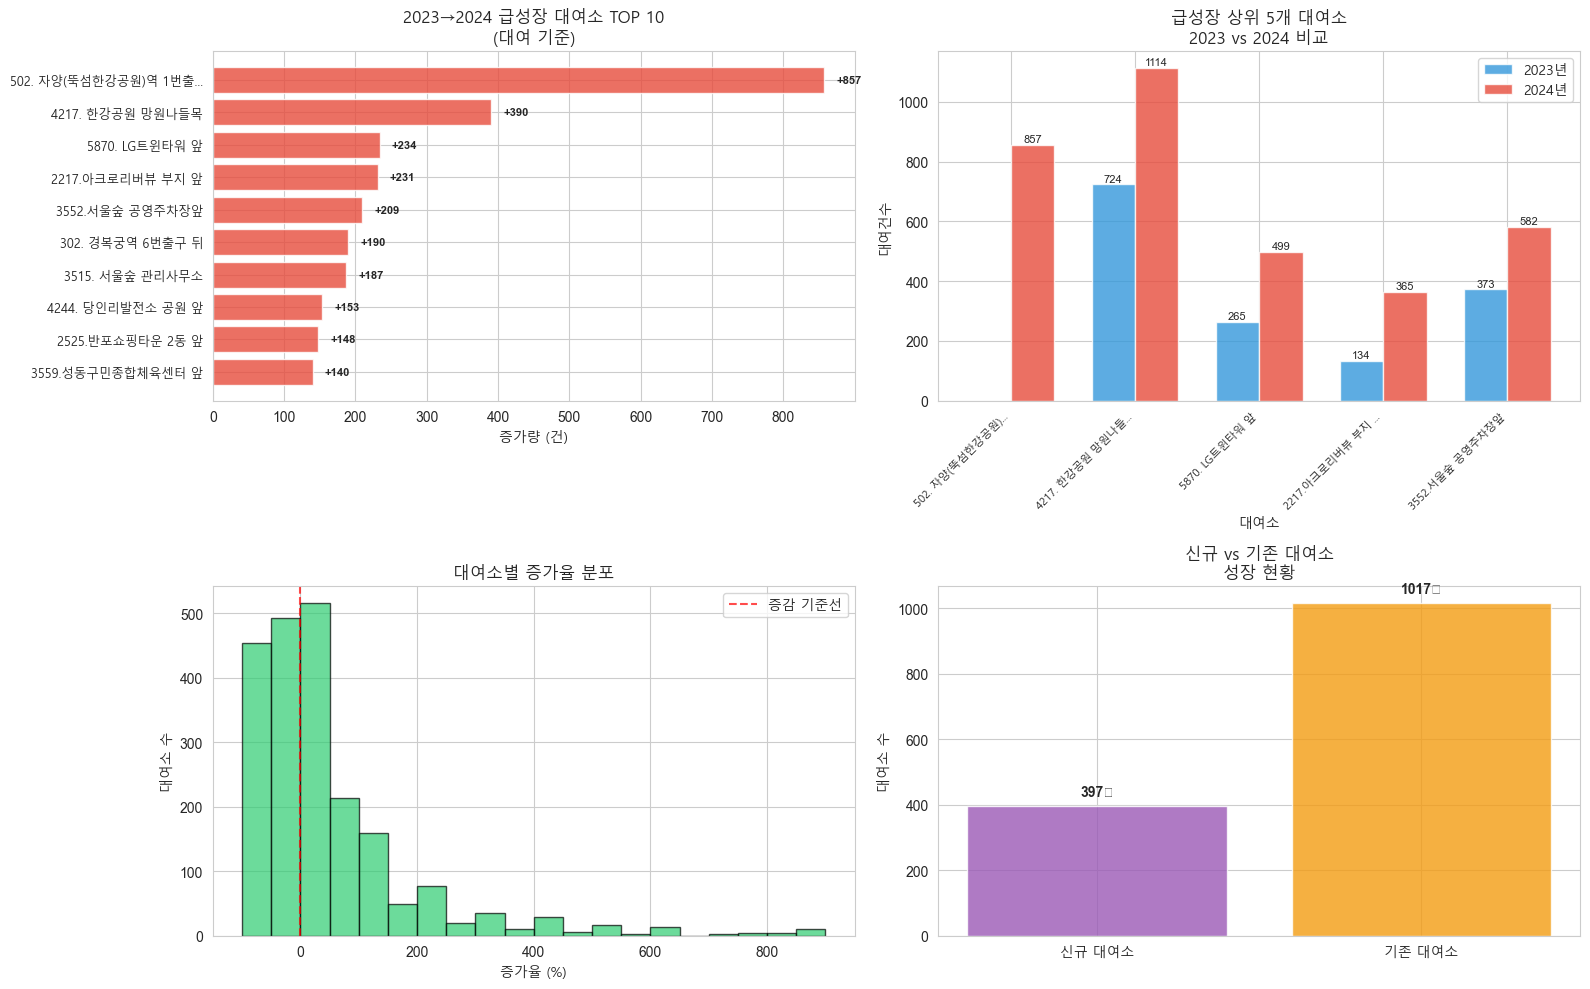

In [114]:
# 급성장 대여소 시각화
if 'comparison_rental' in locals() and len(comparison_rental) > 0:
    # TOP 10 급성장 대여소 시각화
    plt.figure(figsize=(16, 10))
    
    # 상위 10개 급성장 대여소
    top_10_growth = comparison_rental[
        (comparison_rental['대여건수_2024'] >= 10) & 
        (comparison_rental['증가량'] > 0)
    ].nlargest(10, '증가량')
    
    if len(top_10_growth) > 0:
        plt.subplot(2, 2, 1)
        # 대여소명을 간략하게 줄이기
        short_names = [name[:20] + '...' if len(name) > 20 else name for name in top_10_growth['대여소']]
        
        bars = plt.barh(range(len(top_10_growth)), top_10_growth['증가량'], 
                       color='#E74C3C', alpha=0.8)
        plt.yticks(range(len(top_10_growth)), short_names, fontproperties=korean_font_prop, fontsize=9)
        plt.xlabel('증가량 (건)', fontproperties=korean_font_prop)
        plt.title('2023→2024 급성장 대여소 TOP 10\n(대여 기준)', 
                 fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
        plt.gca().invert_yaxis()
        
        # 수치 표시
        for i, (bar, value) in enumerate(zip(bars, top_10_growth['증가량'])):
            plt.text(bar.get_width() + max(top_10_growth['증가량']) * 0.02, 
                    bar.get_y() + bar.get_height()/2, 
                    f'+{int(value)}', ha='left', va='center', fontweight='bold', fontsize=8)
    
    # 2023 vs 2024 비교 (상위 5개)
    if len(top_10_growth) >= 5:
        plt.subplot(2, 2, 2)
        top_5 = top_10_growth.head(5)
        
        x = np.arange(len(top_5))
        width = 0.35
        
        short_names_5 = [name[:15] + '...' if len(name) > 15 else name for name in top_5['대여소']]
        
        bars1 = plt.bar(x - width/2, top_5['대여건수_2023'], width, label='2023년', color='#3498DB', alpha=0.8)
        bars2 = plt.bar(x + width/2, top_5['대여건수_2024'], width, label='2024년', color='#E74C3C', alpha=0.8)
        
        plt.xlabel('대여소', fontproperties=korean_font_prop)
        plt.ylabel('대여건수', fontproperties=korean_font_prop)
        plt.title('급성장 상위 5개 대여소\n2023 vs 2024 비교', 
                 fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
        plt.xticks(x, short_names_5, rotation=45, ha='right', fontproperties=korean_font_prop, fontsize=8)
        plt.legend(prop=korean_font_prop)
        
        # 수치 표시
        for bar in bars1:
            height = bar.get_height()
            if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{int(height)}', ha='center', va='bottom', fontsize=8)
        for bar in bars2:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    # 증가율 분포 히스토그램
    plt.subplot(2, 2, 3)
    growth_rates = comparison_rental[
        (comparison_rental['대여건수_2023'] > 0) & 
        (comparison_rental['증가율'] < 1000)  # 극값 제외
    ]['증가율']
    
    if len(growth_rates) > 0:
        plt.hist(growth_rates, bins=20, color='#2ECC71', alpha=0.7, edgecolor='black')
        plt.xlabel('증가율 (%)', fontproperties=korean_font_prop)
        plt.ylabel('대여소 수', fontproperties=korean_font_prop)
        plt.title('대여소별 증가율 분포', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
        plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='증감 기준선')
        plt.legend(prop=korean_font_prop)
    
    # 신규 vs 기존 대여소 성장 비교
    plt.subplot(2, 2, 4)
    new_stations = comparison_rental[comparison_rental['대여건수_2023'] == 0]
    existing_stations = comparison_rental[comparison_rental['대여건수_2023'] > 0]
    
    categories = ['신규 대여소', '기존 대여소']
    counts = [len(new_stations[new_stations['대여건수_2024'] > 0]), 
              len(existing_stations[existing_stations['증가량'] > 0])]
    
    bars = plt.bar(categories, counts, color=['#9B59B6', '#F39C12'], alpha=0.8)
    plt.ylabel('대여소 수', fontproperties=korean_font_prop)
    plt.title('신규 vs 기존 대여소\n성장 현황', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
    
    # 카테고리 라벨에 한글 폰트 적용
    plt.gca().set_xticklabels(categories, fontproperties=korean_font_prop)
    
    # 수치 표시
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts) * 0.02,
                f'{count}개', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("급성장 분석 데이터가 없습니다.")


## 5. 시각화 - 2024년 월별 상위 대여 장소 히트맵

## 6. 시각화 - 2024년 요일별 상위 대여 장소

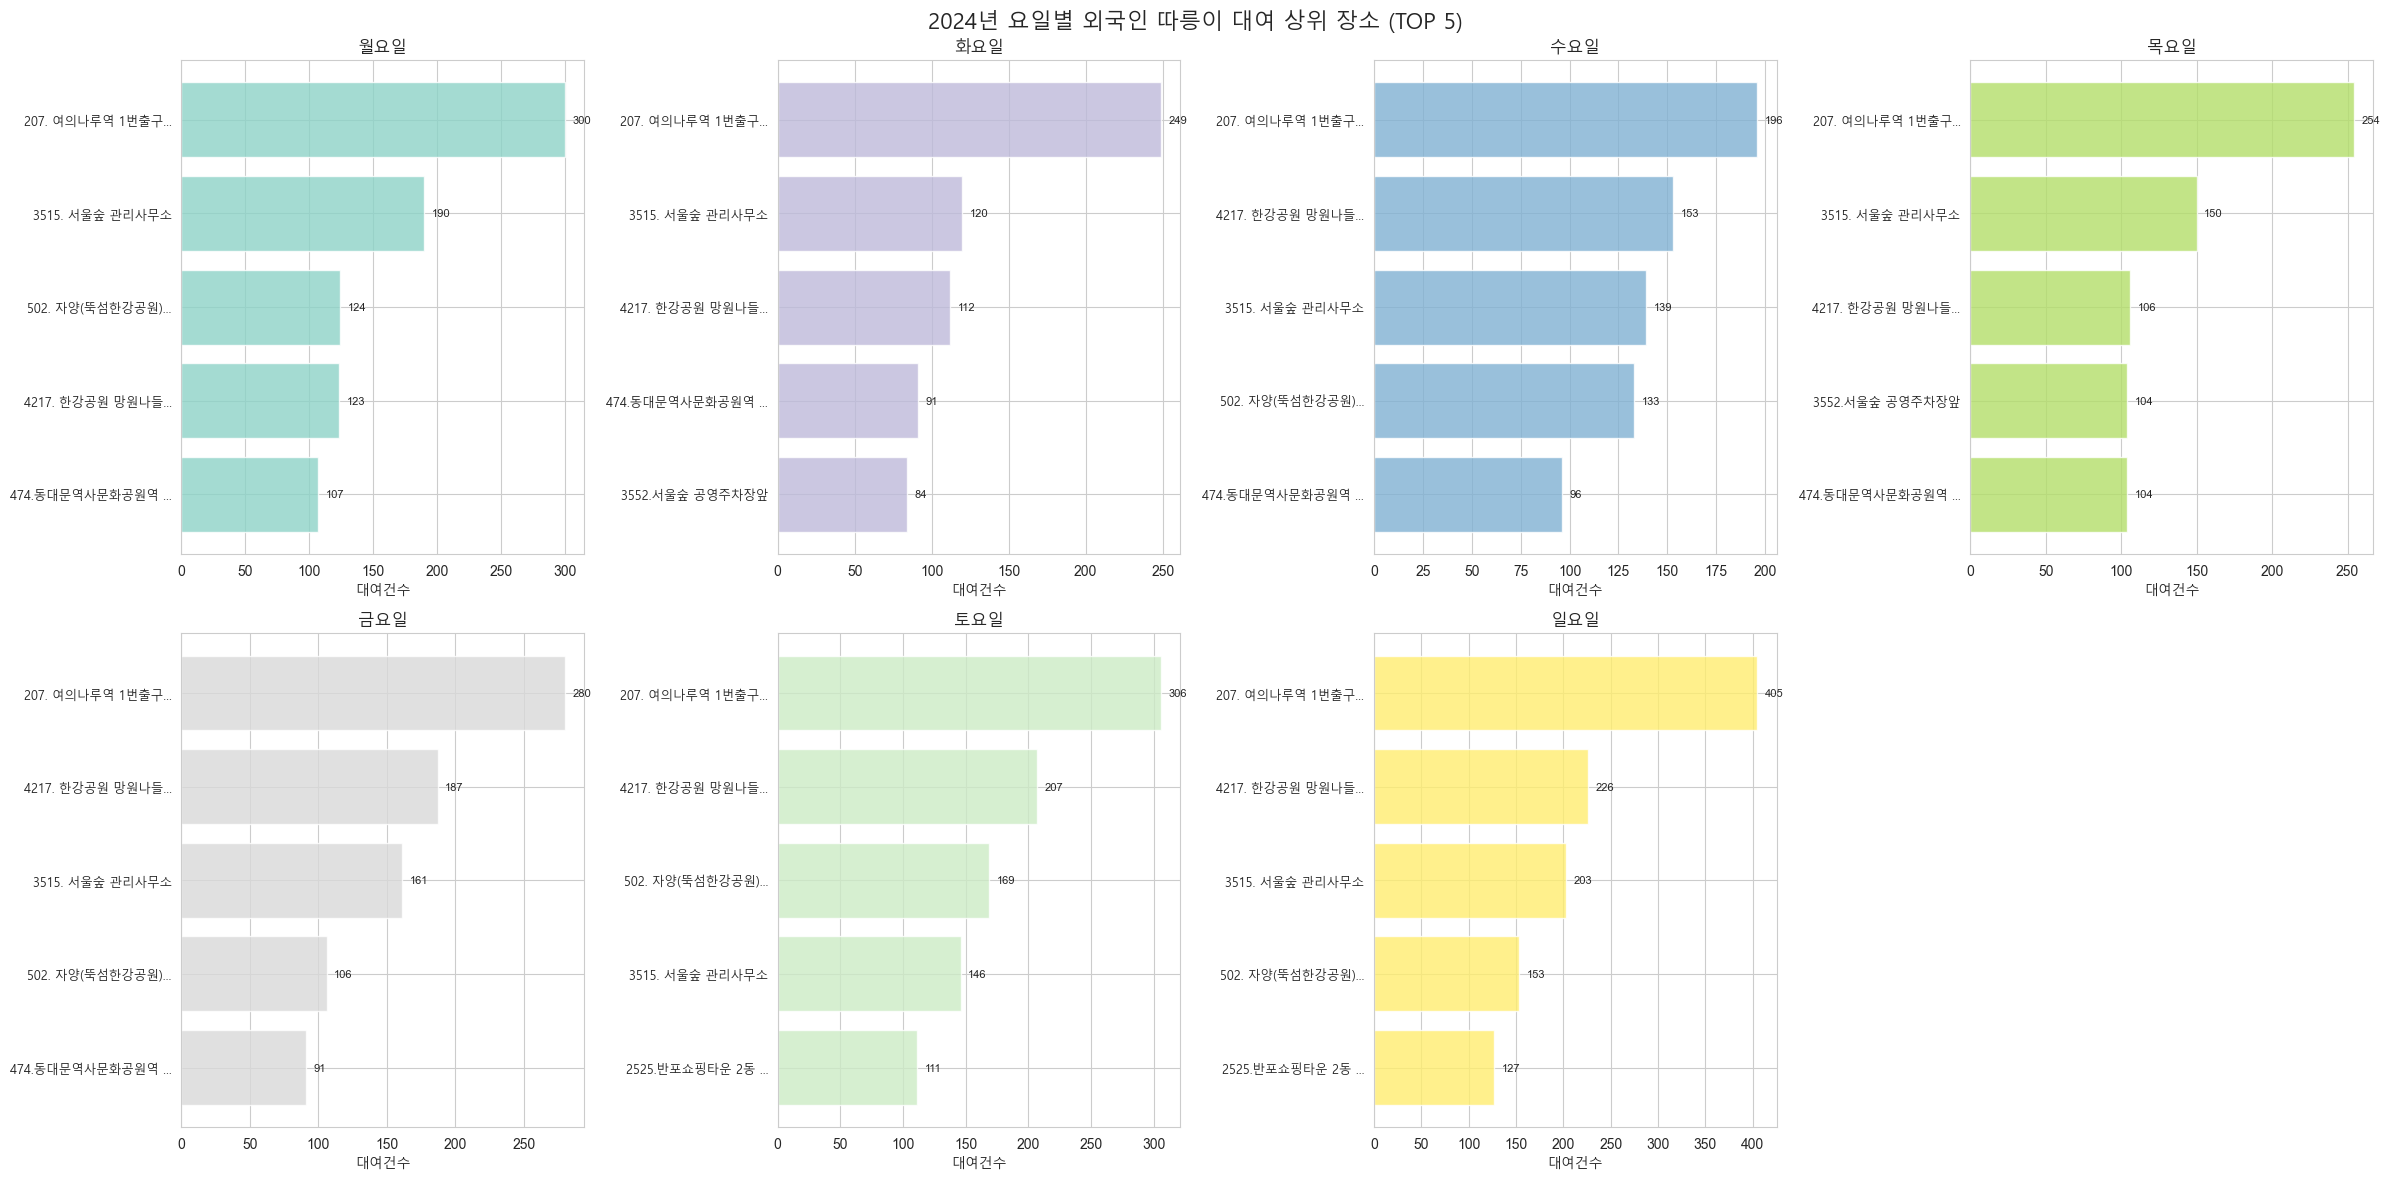

In [115]:
# 2024년 요일별 상위 대여 장소 비교
if 'weekday_rental_rankings' in locals() and weekday_rental_rankings:
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))
    fig.suptitle('2024년 요일별 외국인 따릉이 대여 상위 장소 (TOP 5)', 
                fontproperties=korean_font_prop, fontsize=16, fontweight='bold')
    
    colors = plt.cm.Set3(np.linspace(0, 1, 7))  # 7가지 색상
    
    for idx, (weekday, ranking) in enumerate(weekday_rental_rankings.items()):
        if len(ranking) > 0:
            row = idx // 4
            col = idx % 4
            
            # 장소명을 간략하게 줄이기
            short_names = [name[:15] + '...' if len(name) > 15 else name for name in ranking.index]
            
            bars = axes[row, col].barh(range(len(ranking)), ranking.values, 
                                      color=colors[idx], alpha=0.8)
            axes[row, col].set_yticks(range(len(ranking)))
            axes[row, col].set_yticklabels(short_names, fontproperties=korean_font_prop, fontsize=9)
            axes[row, col].set_xlabel('대여건수', fontproperties=korean_font_prop)
            axes[row, col].set_title(f'{weekday}', fontproperties=korean_font_prop, 
                                   fontsize=12, fontweight='bold')
            axes[row, col].invert_yaxis()
            
            # 수치 표시
            for bar, value in zip(bars, ranking.values):
                axes[row, col].text(bar.get_width() + max(ranking.values) * 0.02, 
                                   bar.get_y() + bar.get_height()/2, 
                                   f'{value}', ha='left', va='center', fontsize=8)
    
    # 마지막 빈 subplot 제거
    if len(weekday_rental_rankings) < 8:
        axes[1, 3].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("요일별 대여 순위 데이터가 없습니다.")


## 7. 종합 분석 결과 및 인사이트

In [116]:
print("=== 외국인 따릉이 이용 장소 분석 종합 결과 ===\n")

# 1. 연도별 최고 인기 장소
print("1. 연도별 최고 인기 대여 장소:")
if yearly_rental_rankings:
    for year, ranking in yearly_rental_rankings.items():
        if len(ranking) > 0:
            top_station = ranking.index[0]
            top_count = ranking.iloc[0]
            print(f"   {year}년: {top_station} ({top_count:,}건)")

print("\n2. 연도별 최고 인기 반납 장소:")
if yearly_return_rankings:
    for year, ranking in yearly_return_rankings.items():
        if len(ranking) > 0:
            top_station = ranking.index[0]
            top_count = ranking.iloc[0]
            print(f"   {year}년: {top_station} ({top_count:,}건)")

# 3. 2024년 월별 패턴 분석
print("\n3. 2024년 월별 최고 인기 대여 장소:")
if 'monthly_rental_rankings' in locals():
    for month, ranking in monthly_rental_rankings.items():
        if len(ranking) > 0:
            top_station = ranking.index[0]
            top_count = ranking.iloc[0]
            print(f"   {month}월: {top_station} ({top_count}건)")

# 4. 요일별 패턴 분석
print("\n4. 2024년 요일별 최고 인기 대여 장소:")
if 'weekday_rental_rankings' in locals():
    for weekday, ranking in weekday_rental_rankings.items():
        if len(ranking) > 0:
            top_station = ranking.index[0]
            top_count = ranking.iloc[0]
            print(f"   {weekday}: {top_station} ({top_count}건)")

# 5. 주요 인사이트
print("\n5. 주요 인사이트:")

# 지속적으로 인기 있는 장소 찾기
if yearly_rental_rankings:
    all_yearly_top_stations = []
    for ranking in yearly_rental_rankings.values():
        if len(ranking) > 0:
            all_yearly_top_stations.extend(ranking.index[:3])  # 각 년도 상위 3개
    
    # 가장 자주 등장하는 장소들
    from collections import Counter
    station_frequency = Counter(all_yearly_top_stations)
    
    print("   - 4년간 지속적으로 인기 있는 대여 장소:")
    for station, freq in station_frequency.most_common(5):
        print(f"     {station} (상위권 등장 {freq}회)")

# 관광지와의 연관성 분석
print("\n   - 관광지 주변 인기 장소 패턴:")
tourism_keywords = ['명동', '광화문', '홍대', '강남', '이태원', '인사동', '종로', '한강', '서울역', '동대문']

if yearly_rental_rankings:
    for year, ranking in yearly_rental_rankings.items():
        tourism_stations = []
        for station in ranking.index[:10]:
            for keyword in tourism_keywords:
                if keyword in station:
                    tourism_stations.append(station)
                    break
        
        if tourism_stations:
            print(f"     {year}년: {len(tourism_stations)}개 관광지 주변 대여소가 상위 10위권")

print("\n   - 외국인들은 주요 관광지 주변에서 따릉이를 주로 이용하는 패턴을 보임")
print("   - 지하철역 근처 대여소의 인기가 높아 대중교통과 연계 이용하는 경향")
print("   - 월별/요일별로 특정 장소의 선호도에 차이가 있어 계절성과 이용 패턴 존재")


=== 외국인 따릉이 이용 장소 분석 종합 결과 ===

1. 연도별 최고 인기 대여 장소:
   2021년: 207. 여의나루역 1번출구 앞 (587건)
   2022년: 207. 여의나루역 1번출구 앞 (1,823건)
   2023년: 207. 여의나루역 1번출구 앞 (2,236건)
   2024년: 207. 여의나루역 1번출구 앞 (1,990건)

2. 연도별 최고 인기 반납 장소:
   2021년: 207. 여의나루역 1번출구 앞 (559건)
   2022년: 207. 여의나루역 1번출구 앞 (1,525건)
   2023년: 207. 여의나루역 1번출구 앞 (2,069건)
   2024년: 207. 여의나루역 1번출구 앞 (1,789건)

3. 2024년 월별 최고 인기 대여 장소:
   1월: 474.동대문역사문화공원역 1번출구 뒤편 (35건)
   2월: 207. 여의나루역 1번출구 앞 (49건)
   3월: 207. 여의나루역 1번출구 앞 (151건)
   4월: 207. 여의나루역 1번출구 앞 (337건)
   5월: 207. 여의나루역 1번출구 앞 (270건)
   6월: 207. 여의나루역 1번출구 앞 (313건)
   7월: 207. 여의나루역 1번출구 앞 (190건)
   8월: 207. 여의나루역 1번출구 앞 (130건)
   9월: 207. 여의나루역 1번출구 앞 (214건)
   10월: 207. 여의나루역 1번출구 앞 (184건)
   11월: 207. 여의나루역 1번출구 앞 (100건)
   12월: 207. 여의나루역 1번출구 앞 (36건)

4. 2024년 요일별 최고 인기 대여 장소:
   월요일: 207. 여의나루역 1번출구 앞 (300건)
   화요일: 207. 여의나루역 1번출구 앞 (249건)
   수요일: 207. 여의나루역 1번출구 앞 (196건)
   목요일: 207. 여의나루역 1번출구 앞 (254건)
   금요일: 207. 여의나루역 1번출구 앞 (280건)
   토요일: 207. 여의나루역 1번출구 앞 (3

In [117]:
# 2023년 vs 2024년 대여소별 변화 분석
print("=== 2023년 vs 2024년 대여소별 급성장 분석 ===\n")

if 2023 in yearly_rental_rankings and 2024 in yearly_rental_rankings:
    # 2023년과 2024년 전체 데이터 로드
    try:
        df_2023 = pd.read_csv('../Monthly_23년_외국인대여정보.csv', encoding='utf-8-sig')
        df_2024 = pd.read_csv('../Monthly_24년_외국인대여정보.csv', encoding='utf-8-sig')
        
        # 2023년 대여소별 합계 (대여소 컬럼명 통일)
        rental_2023 = df_2023.groupby('대여소')['대여건수'].sum().reset_index()
        rental_2023.columns = ['대여소', '대여건수_2023']
        
        return_2023 = df_2023.groupby('대여소')['반납건수'].sum().reset_index()
        return_2023.columns = ['대여소', '반납건수_2023']
        
        # 2024년 대여소별 합계 (대여소명 -> 대여소로 통일)
        rental_2024 = df_2024.groupby('대여소명')['대여건수'].sum().reset_index()
        rental_2024.columns = ['대여소', '대여건수_2024']
        
        return_2024 = df_2024.groupby('대여소명')['반납건수'].sum().reset_index()
        return_2024.columns = ['대여소', '반납건수_2024']
        
        # 데이터 합치기 (outer join으로 모든 대여소 포함)
        comparison_rental = pd.merge(rental_2023, rental_2024, on='대여소', how='outer').fillna(0)
        comparison_return = pd.merge(return_2023, return_2024, on='대여소', how='outer').fillna(0)
        
        # 증가량 및 증가율 계산 (대여)
        comparison_rental['증가량'] = comparison_rental['대여건수_2024'] - comparison_rental['대여건수_2023']
        comparison_rental['증가율'] = comparison_rental.apply(
            lambda x: ((x['대여건수_2024'] - x['대여건수_2023']) / x['대여건수_2023'] * 100) 
            if x['대여건수_2023'] > 0 else (float('inf') if x['대여건수_2024'] > 0 else 0), axis=1
        )
        
        # 증가량 및 증가율 계산 (반납)
        comparison_return['증가량'] = comparison_return['반납건수_2024'] - comparison_return['반납건수_2023']
        comparison_return['증가율'] = comparison_return.apply(
            lambda x: ((x['반납건수_2024'] - x['반납건수_2023']) / x['반납건수_2023'] * 100) 
            if x['반납건수_2023'] > 0 else (float('inf') if x['반납건수_2024'] > 0 else 0), axis=1
        )
        
        print("1. 대여 건수 기준 급성장 대여소 TOP 10:")
        # 2024년에 최소 10건 이상 대여가 있고, 증가량이 큰 순서
        top_growth_rental = comparison_rental[
            (comparison_rental['대여건수_2024'] >= 10) & 
            (comparison_rental['증가량'] > 0)
        ].nlargest(10, '증가량')
        
        for idx, row in top_growth_rental.iterrows():
            if row['증가율'] == float('inf'):
                growth_text = "신규 등장"
            else:
                growth_text = f"+{row['증가율']:.1f}%"
            
            print(f"   {row['대여소']}")
            print(f"      2023년: {int(row['대여건수_2023'])}건 → 2024년: {int(row['대여건수_2024'])}건")
            print(f"      증가량: +{int(row['증가량'])}건 ({growth_text})\n")
        
        print("\n2. 반납 건수 기준 급성장 대여소 TOP 10:")
        # 2024년에 최소 10건 이상 반납이 있고, 증가량이 큰 순서
        top_growth_return = comparison_return[
            (comparison_return['반납건수_2024'] >= 10) & 
            (comparison_return['증가량'] > 0)
        ].nlargest(10, '증가량')
        
        for idx, row in top_growth_return.iterrows():
            if row['증가율'] == float('inf'):
                growth_text = "신규 등장"
            else:
                growth_text = f"+{row['증가율']:.1f}%"
            
            print(f"   {row['대여소']}")
            print(f"      2023년: {int(row['반납건수_2023'])}건 → 2024년: {int(row['반납건수_2024'])}건")
            print(f"      증가량: +{int(row['증가량'])}건 ({growth_text})\n")
        
        print("\n3. 급성장 대여소의 특징:")
        
        # 신규 등장한 대여소들 (2023년 0건, 2024년 10건 이상)
        new_stations_rental = comparison_rental[
            (comparison_rental['대여건수_2023'] == 0) & 
            (comparison_rental['대여건수_2024'] >= 10)
        ].nlargest(5, '대여건수_2024')
        
        if len(new_stations_rental) > 0:
            print("   신규 등장 대여소 (2023년 0건 → 2024년 활발):")
            for idx, row in new_stations_rental.iterrows():
                print(f"     - {row['대여소']}: {int(row['대여건수_2024'])}건")
        
        # 기존 대여소 중 급성장 (증가율 200% 이상)
        rapid_growth = comparison_rental[
            (comparison_rental['대여건수_2023'] > 0) & 
            (comparison_rental['증가율'] >= 200) &
            (comparison_rental['대여건수_2024'] >= 20)
        ].nlargest(5, '증가율')
        
        if len(rapid_growth) > 0:
            print("\n   기존 대여소 중 급성장 (증가율 200% 이상):")
            for idx, row in rapid_growth.iterrows():
                print(f"     - {row['대여소']}: {int(row['대여건수_2023'])}건 → {int(row['대여건수_2024'])}건 (+{row['증가율']:.1f}%)")
        
        # 관광지 키워드 분석
        tourism_keywords = ['명동', '광화문', '홍대', '강남', '이태원', '인사동', '종로', '한강', '서울역', '동대문', '잠실', '여의도']
        tourism_growth = []
        
        for idx, row in top_growth_rental.iterrows():
            for keyword in tourism_keywords:
                if keyword in row['대여소']:
                    tourism_growth.append((row['대여소'], keyword, int(row['증가량'])))
                    break
        
        if tourism_growth:
            print("\n   관광지 주변 급성장 대여소:")
            for station, keyword, growth in tourism_growth:
                print(f"     - {station} ({keyword} 관련): +{growth}건")
        
    except Exception as e:
        print(f"데이터 분석 실패: {e}")
else:
    print("2023년 또는 2024년 데이터가 없습니다.")


=== 2023년 vs 2024년 대여소별 급성장 분석 ===

1. 대여 건수 기준 급성장 대여소 TOP 10:
   502. 자양(뚝섬한강공원)역 1번출구 앞
      2023년: 0건 → 2024년: 857건
      증가량: +857건 (신규 등장)

   4217. 한강공원 망원나들목
      2023년: 724건 → 2024년: 1114건
      증가량: +390건 (+53.9%)

   5870. LG트윈타워 앞
      2023년: 265건 → 2024년: 499건
      증가량: +234건 (+88.3%)

   2217.아크로리버뷰 부지 앞
      2023년: 134건 → 2024년: 365건
      증가량: +231건 (+172.4%)

   3552.서울숲 공영주차장앞
      2023년: 373건 → 2024년: 582건
      증가량: +209건 (+56.0%)

   302. 경복궁역 6번출구 뒤
      2023년: 0건 → 2024년: 190건
      증가량: +190건 (신규 등장)

   3515. 서울숲 관리사무소
      2023년: 922건 → 2024년: 1109건
      증가량: +187건 (+20.3%)

   4244. 당인리발전소 공원 앞
      2023년: 160건 → 2024년: 313건
      증가량: +153건 (+95.6%)

   2525.반포쇼핑타운 2동 앞
      2023년: 448건 → 2024년: 596건
      증가량: +148건 (+33.0%)

   3559.성동구민종합체육센터 앞
      2023년: 216건 → 2024년: 356건
      증가량: +140건 (+64.8%)


2. 반납 건수 기준 급성장 대여소 TOP 10:
   502. 자양(뚝섬한강공원)역 1번출구 앞
      2023년: 0건 → 2024년: 1008건
      증가량: +1008건 (신규 등장)

   2217.아크로리버뷰 부지 앞
      2023

C:\Users\SBA\AppData\Local\Temp\ipykernel_6928\3541594459.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, fontproperties=korean_font_prop)


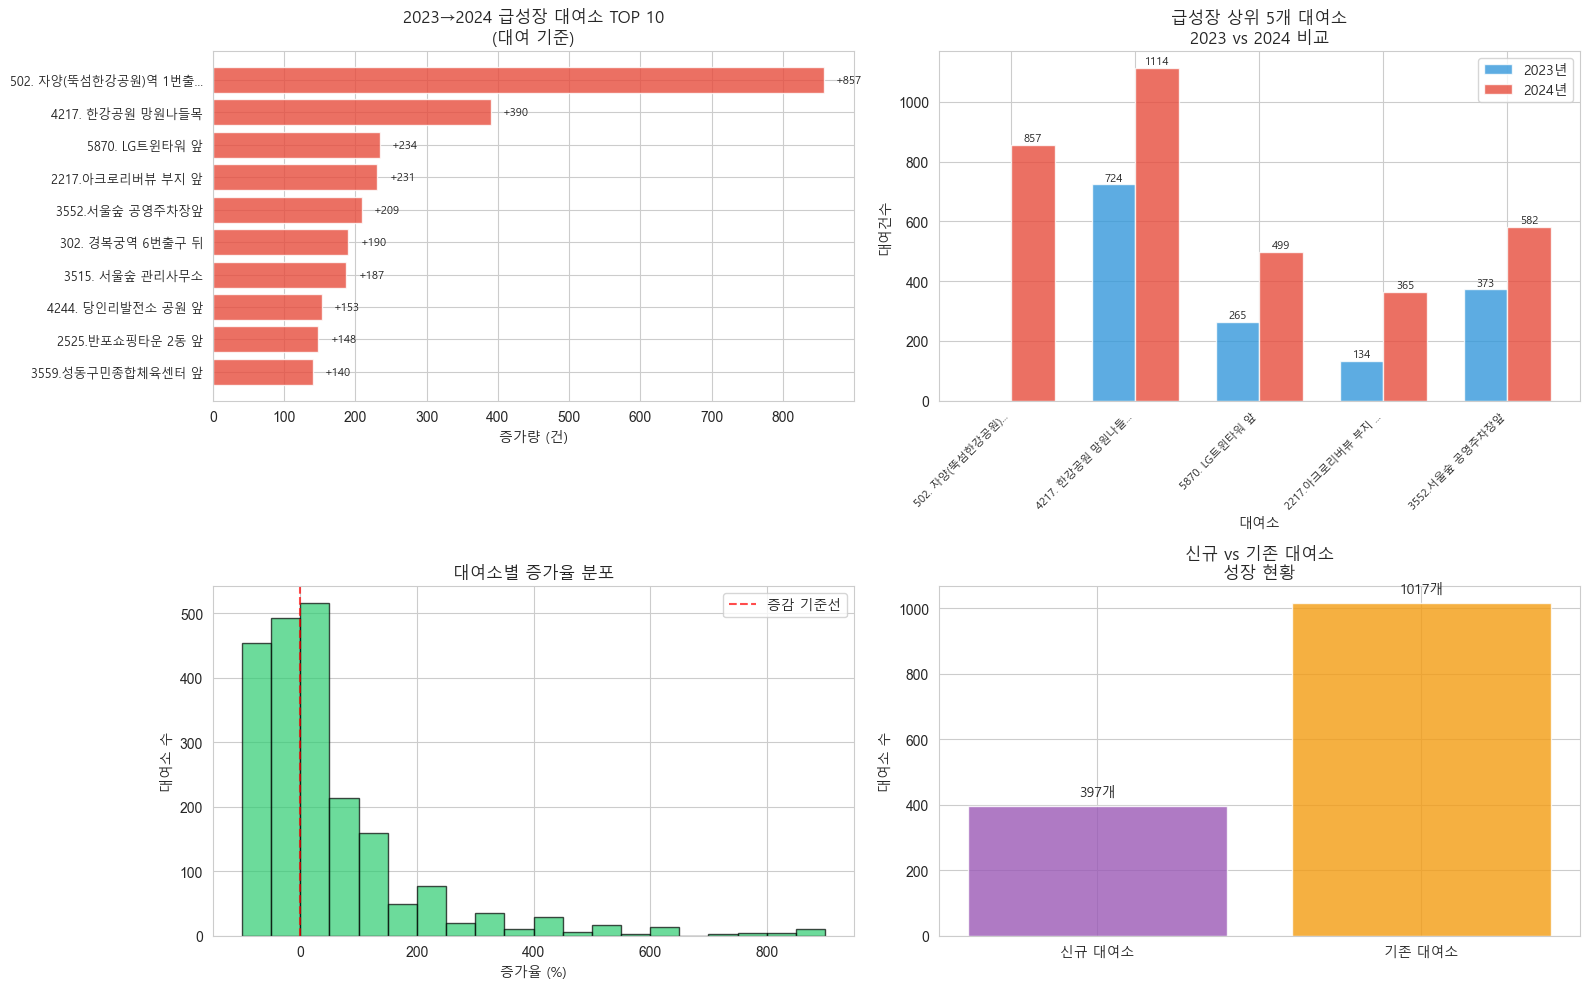

In [ ]:
# 급성장 대여소 시각화
if 'comparison_rental' in locals() and len(comparison_rental) > 0:
    # TOP 10 급성장 대여소 시각화
    plt.figure(figsize=(16, 10))
    
    # 상위 10개 급성장 대여소
    top_10_growth = comparison_rental[
        (comparison_rental['대여건수_2024'] >= 10) & 
        (comparison_rental['증가량'] > 0)
    ].nlargest(10, '증가량')
    
    if len(top_10_growth) > 0:
        plt.subplot(2, 2, 1)
        # 대여소명을 간략하게 줄이기
        short_names = [name[:20] + '...' if len(name) > 20 else name for name in top_10_growth['대여소']]
        
        bars = plt.barh(range(len(top_10_growth)), top_10_growth['증가량'], 
                       color='#E74C3C', alpha=0.8)
        plt.yticks(range(len(top_10_growth)), short_names, fontproperties=korean_font_prop, fontsize=9)
        plt.xlabel('증가량 (건)', fontproperties=korean_font_prop)
        plt.title('2023→2024 급성장 대여소 TOP 10\n(대여 기준)', 
                 fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
        plt.gca().invert_yaxis()
        
        # 수치 표시
        for i, (bar, value) in enumerate(zip(bars, top_10_growth['증가량'])):
            plt.text(bar.get_width() + max(top_10_growth['증가량']) * 0.02, 
                    bar.get_y() + bar.get_height()/2, 
                    f'+{int(value)}', ha='left', va='center', fontweight='bold', fontsize=8,
                    fontproperties=korean_font_prop)
    
    # 2023 vs 2024 비교 (상위 5개)
    if len(top_10_growth) >= 5:
        plt.subplot(2, 2, 2)
        top_5 = top_10_growth.head(5)
        
        x = np.arange(len(top_5))
        width = 0.35
        
        short_names_5 = [name[:15] + '...' if len(name) > 15 else name for name in top_5['대여소']]
        
        bars1 = plt.bar(x - width/2, top_5['대여건수_2023'], width, label='2023년', color='#3498DB', alpha=0.8)
        bars2 = plt.bar(x + width/2, top_5['대여건수_2024'], width, label='2024년', color='#E74C3C', alpha=0.8)
        
        plt.xlabel('대여소', fontproperties=korean_font_prop)
        plt.ylabel('대여건수', fontproperties=korean_font_prop)
        plt.title('급성장 상위 5개 대여소\n2023 vs 2024 비교', 
                 fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
        plt.xticks(x, short_names_5, rotation=45, ha='right', fontproperties=korean_font_prop, fontsize=8)
        plt.legend(prop=korean_font_prop)
        
        # 수치 표시
        for bar in bars1:
            height = bar.get_height()
            if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{int(height)}', ha='center', va='bottom', fontsize=8,
                        fontproperties=korean_font_prop)
        for bar in bars2:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{int(height)}', ha='center', va='bottom', fontsize=8,
                    fontproperties=korean_font_prop)
    
    # 증가율 분포 히스토그램
    plt.subplot(2, 2, 3)
    growth_rates = comparison_rental[
        (comparison_rental['대여건수_2023'] > 0) & 
        (comparison_rental['증가율'] < 1000)  # 극값 제외
    ]['증가율']
    
    if len(growth_rates) > 0:
        plt.hist(growth_rates, bins=20, color='#2ECC71', alpha=0.7, edgecolor='black')
        plt.xlabel('증가율 (%)', fontproperties=korean_font_prop)
        plt.ylabel('대여소 수', fontproperties=korean_font_prop)
        plt.title('대여소별 증가율 분포', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
        plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='증감 기준선')
        plt.legend(prop=korean_font_prop)
    
    # 신규 vs 기존 대여소 성장 비교
    plt.subplot(2, 2, 4)
    new_stations = comparison_rental[comparison_rental['대여건수_2023'] == 0]
    existing_stations = comparison_rental[comparison_rental['대여건수_2023'] > 0]
    
    categories = ['신규 대여소', '기존 대여소']
    counts = [len(new_stations[new_stations['대여건수_2024'] > 0]), 
              len(existing_stations[existing_stations['증가량'] > 0])]
    
    bars = plt.bar(categories, counts, color=['#9B59B6', '#F39C12'], alpha=0.8)
    plt.ylabel('대여소 수', fontproperties=korean_font_prop)
    plt.title('신규 vs 기존 대여소\n성장 현황', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
    
    # 카테고리 라벨에 한글 폰트 적용
    ax = plt.gca()
    ax.set_xticklabels(categories, fontproperties=korean_font_prop)
    
    # 수치 표시
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts) * 0.02,
                f'{count}개', ha='center', va='bottom', fontweight='bold',
                fontproperties=korean_font_prop)
    
    plt.tight_layout()
    plt.show()
else:
    print("급성장 분석 데이터가 없습니다.")
